In [1]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('News.csv')

In [4]:
df.size

25340

In [5]:
df.shape

(6335, 4)

In [6]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
labels = df.label

In [8]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [9]:
#Splitting the data sets

x_train, x_test, y_train, y_test=train_test_split(df['text'], labels, test_size=0.2, random_state= 7)

In [10]:
#Initializing a TfidfVectorizer

tfidf_vectorizer= TfidfVectorizer(stop_words= 'english',max_df=0.7)

#Fit and transform train set, transform test set.

tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test= tfidf_vectorizer.transform(x_test)

# 1. Passive Aggressive Classifier


In [11]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [12]:
#Initializing a PassiveAggressiveClassifier

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

pred_pac=pac.predict(tfidf_test)
pac.score= accuracy_score(y_test, pred_pac)
print(f"Accuracy: {round(pac.score*100,2)}%")

Accuracy: 92.66%


In [13]:
print(classification_report(y_test, pred_pac))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [14]:
#Confusion Matrix

cm1 = confusion_matrix(y_test, pred_pac,labels=['FAKE','REAL'])
cm1

array([[588,  50],
       [ 43, 586]], dtype=int64)

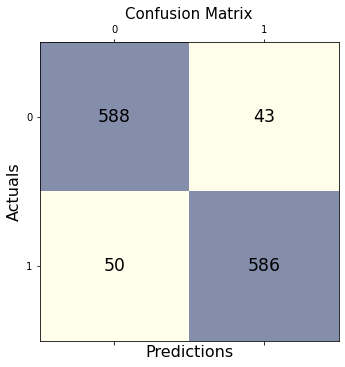

In [34]:
# Setting the attributes
fig, px = plt.subplots(figsize=(5.5, 5.5))
px.matshow(cm1, cmap=plt.cm.YlGnBu, alpha=0.5)
for m in range(cm1.shape[0]):
    for n in range(cm1.shape[1]):
        px.text(x=m,y=n,s=cm1[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# 2. Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
LR = LogisticRegression()
LR.fit(tfidf_train, y_train)

pred_lr=LR.predict(tfidf_test)
LR.score=accuracy_score(y_test, pred_lr)
print(f"Accuracy: {round(LR.score*100,2)}%")

Accuracy: 91.71%


In [19]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        FAKE       0.90      0.94      0.92       638
        REAL       0.94      0.89      0.91       629

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [20]:
#Confusion Matrix

cm2= confusion_matrix(y_test, pred_lr,labels=['FAKE','REAL'])
cm2


array([[600,  38],
       [ 67, 562]], dtype=int64)

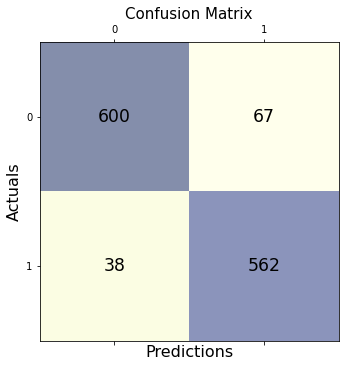

In [21]:
# Setting the attributes
fig, px = plt.subplots(figsize=(5.5, 5.5))
px.matshow(cm2, cmap=plt.cm.YlGnBu, alpha=0.5)
for m in range(cm2.shape[0]):
    for n in range(cm2.shape[1]):
        px.text(x=m,y=n,s=cm2[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# 3. Decision Tree Classification

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
DT = DecisionTreeClassifier()
DT.fit(tfidf_train, y_train)

pred_dt = DT.predict(tfidf_test)
DT.score=accuracy_score(y_test, pred_dt)
print(f"Accuracy: {round(DT.score*100,2)}%")

Accuracy: 79.56%


In [24]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

        FAKE       0.79      0.81      0.80       638
        REAL       0.80      0.79      0.79       629

    accuracy                           0.80      1267
   macro avg       0.80      0.80      0.80      1267
weighted avg       0.80      0.80      0.80      1267



In [25]:
#Confusion Matrix

cm3= confusion_matrix(y_test, pred_dt,labels=['FAKE','REAL'])
cm3


array([[514, 124],
       [135, 494]], dtype=int64)

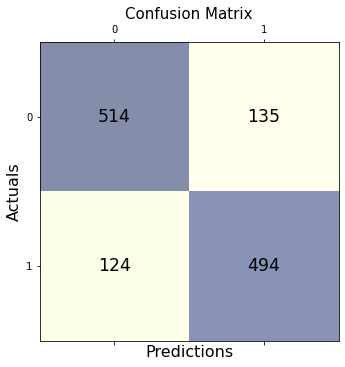

In [35]:
# Setting the attributes
fig, px = plt.subplots(figsize=(5.5, 5.5))
px.matshow(cm3, cmap=plt.cm.YlGnBu, alpha=0.5)
for m in range(cm3.shape[0]):
    for n in range(cm3.shape[1]):
        px.text(x=m,y=n,s=cm3[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# 4. Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(tfidf_train, y_train)

pred_rfc = RFC.predict(tfidf_test)
RFC.score=accuracy_score(y_test, pred_rfc)
print(f"Accuracy: {round(RFC.score*100,2)}%")

Accuracy: 90.29%


In [29]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

        FAKE       0.90      0.90      0.90       638
        REAL       0.90      0.90      0.90       629

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [30]:
cm4 = confusion_matrix(y_test, pred_rfc,labels=['FAKE','REAL'])
cm4

array([[576,  62],
       [ 61, 568]], dtype=int64)

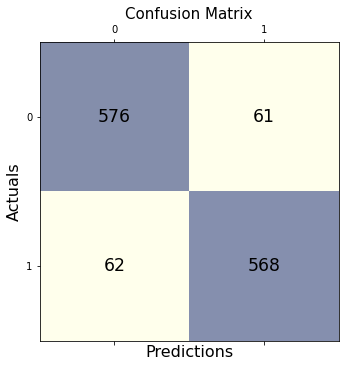

In [31]:
# Setting the attributes
fig, px = plt.subplots(figsize=(5.5, 5.5))
px.matshow(cm4, cmap=plt.cm.YlGnBu, alpha=0.5)
for m in range(cm4.shape[0]):
    for n in range(cm4.shape[1]):
        px.text(x=m,y=n,s=cm4[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()